# Assignment - Build the same interactive ML Model for IPL final 2019 - MI vs CSK

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
ipl_df = pd.read_csv('IPL_ball_by_ball_updated.csv')

In [3]:
ipl_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ipl_df.innings.unique()

array([2, 1, 4, 3, 6, 5], dtype=int64)

In [5]:
ipl_df = ipl_df[(ipl_df.innings == 1) | (ipl_df.innings == 2)]

In [6]:
ipl_df.innings.unique()

array([2, 1], dtype=int64)

In [7]:
ipl_df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

# Needed Additional Colums:

In [8]:
ipl_df['total_runs'] = ipl_df.apply(lambda x: x['runs_off_bat'] + x['extras'], axis = 1)

In [9]:
ipl_df['isOut'] = ipl_df['player_dismissed'].apply(lambda x: 1 if type(x) == type('str') else 0)

In [10]:
ipl_df.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [11]:
ipl_df[ipl_df.batting_team == 'Mumbai Indians'].total_runs.value_counts()

1    11336
0    9974 
4    3198 
2    1721 
6    1403 
3    104  
5    54   
7    7    
Name: total_runs, dtype: int64

In [12]:
ipl_df[ipl_df.batting_team == 'Chennai Super Kings'].total_runs.value_counts()

1    10515
0    8661 
4    2829 
2    1706 
6    1259 
3    98   
5    46   
7    9    
Name: total_runs, dtype: int64

# Choosing Team - Mumbai Indians Vs Chennai Super Kings in IPL 2019 Final

In [13]:
ipl_df= ipl_df[ipl_df['season'] == 2019]

In [14]:
ipl_df.groupby(['match_id'])['start_date'].unique()

match_id
1175356    [2019-03-23]
1175357    [2019-03-24]
1175358    [2019-03-24]
1175359    [2019-03-25]
1175360    [2019-03-26]
1175361    [2019-03-27]
1175362    [2019-03-28]
1175363    [2019-03-29]
1175364    [2019-03-30]
1175365    [2019-03-30]
1175366    [2019-03-31]
1175367    [2019-03-31]
1175368    [2019-04-01]
1175369    [2019-04-02]
1175370    [2019-04-03]
1175371    [2019-04-04]
1175372    [2019-04-05]
1178393    [2019-04-06]
1178394    [2019-04-06]
1178395    [2019-04-07]
1178396    [2019-04-07]
1178397    [2019-04-08]
1178398    [2019-04-09]
1178399    [2019-04-10]
1178400    [2019-04-11]
1178401    [2019-04-12]
1178402    [2019-04-13]
1178403    [2019-04-13]
1178404    [2019-04-14]
1178405    [2019-04-14]
1178406    [2019-04-15]
1178407    [2019-04-16]
1178408    [2019-04-17]
1178409    [2019-04-18]
1178410    [2019-04-19]
1178411    [2019-04-20]
1178412    [2019-04-20]
1178413    [2019-04-21]
1178414    [2019-04-21]
1178415    [2019-04-22]
1178416    [2019-04-23]
1178417

In [15]:
# 'Mumbai Indians' Vs 'Chennai Super Kings
# t1 - bat first, t2 - bat second

t1 = 'Mumbai Indians'
t2 = 'Chennai Super Kings'

In [16]:
ipl_df[(ipl_df.batting_team == t1) & (ipl_df.bowling_team == t2) & (ipl_df.innings == 1)].match_id.unique()

array([1175370, 1178419, 1181768], dtype=int64)

In [17]:
required_match_id = 1181768

In [18]:
ipl_df[ipl_df.match_id == required_match_id].head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
178810,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,6.6,Chennai Super Kings,Mumbai Indians,SR Watson,SK Raina,MJ McClenaghan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [19]:
t1_outs = ipl_df[ipl_df.batting_team == t1].isOut.sum()
t2_outs = ipl_df[ipl_df.batting_team == t2].isOut.sum()

In [20]:
t1_outcomes = ipl_df[ipl_df.batting_team == t1].total_runs.value_counts()
t2_outcomes = ipl_df[ipl_df.batting_team == t2].total_runs.value_counts()

In [21]:
outcomes = [0, 1, 2, 3, 4, 6, 'w']

In [22]:
t1_outcomes_count = []
for outcome in outcomes:
    try:
        if outcome != 'w':
            t1_outcomes_count.append(t1_outcomes[outcome])
        else:
            t1_outcomes_count.append(t1_outs)
    except:
        t1_outcomes_count.append(0)
        

t2_outcomes_count = []
for outcome in outcomes:
    try:
        if outcome != 'w':
            t2_outcomes_count.append(t2_outcomes[outcome])
        else:
            t2_outcomes_count.append(t2_outs)
    except:
        t2_outcomes_count.append(0)

In [23]:
print(t1_outcomes_count)
print(t2_outcomes_count)

[685, 789, 107, 8, 234, 112, 92]
[793, 833, 118, 3, 211, 87, 88]


In [24]:
t1_pb = [i/sum(t1_outcomes_count) for i in t1_outcomes_count]
t2_pb = [i/sum(t2_outcomes_count) for i in t2_outcomes_count]

In [25]:
print(t1_pb)
print(t2_pb)

[0.33793783917118897, 0.3892451899358658, 0.05278737049827331, 0.003946719289590528, 0.11544153922052294, 0.05525407005426739, 0.04538727183029107]
[0.3717768401312705, 0.39052977027660574, 0.05532114392873887, 0.0014064697609001407, 0.09892170651664323, 0.040787623066104076, 0.04125644631973746]


In [26]:
t1_cum_pb = list(np.cumsum(t1_pb))
t2_cum_pb = list(np.cumsum(t2_pb))

In [27]:
t1_cum_pb

[0.33793783917118897,
 0.7271830291070548,
 0.7799703996053281,
 0.7839171188949187,
 0.8993586581154416,
 0.954612728169709,
 1.0]

## first innings

In [28]:
i1p_0 = t1_cum_pb[0]
i1p_1 = t1_cum_pb[1]
i1p_2 = t1_cum_pb[2]
i1p_3 = t1_cum_pb[3]
i1p_4 = t1_cum_pb[4]
i1p_6 = t1_cum_pb[5]
i1p_w = 1

pred_runs = 0
pred_wks = 0

for i in range(120):
    r_value = np.random.random()

    if r_value <= i1p_0:
        pred_runs += 0
    elif r_value <= i1p_1:
        pred_runs += 1
    elif r_value <= i1p_2:
        pred_runs += 2
    elif r_value <= i1p_3:
        pred_runs += 3
    elif r_value <= i1p_4:
        pred_runs += 4
    elif r_value <= i1p_6:
        pred_runs += 6
    else:
        pred_runs += 0
        pred_wks += 1
        if pred_wks == 10:
            break

## Function: 1st Innings runs prediction

In [29]:
# first innings
def innings_1_runs(curr_overs, curr_score, curr_wickets):
    i1p_0 = t1_cum_pb[0]
    i1p_1 = t1_cum_pb[1]
    i1p_2 = t1_cum_pb[2]
    i1p_3 = t1_cum_pb[3]
    i1p_4 = t1_cum_pb[4]
    i1p_6 = t1_cum_pb[5]
    i1p_w = 1

    # initialize runs, wickets
    pred_runs = curr_score
    pred_wks = curr_wickets
    
    # calculate leftover balls
    over_ball = curr_overs
    over_number = int(str(over_ball).split('.')[0])
    ball_number = int(str(over_ball).split('.')[1])
    
    if ball_number >= 6:
        ball_number = 6
    current_balls = over_number*6 + ball_number 
    leftover_balls = 120 - current_balls

    for i in range(leftover_balls):
    
        r_value = np.random.random()

        if r_value <= i1p_0:
            pred_runs += 0
        elif r_value <= i1p_1:
            pred_runs += 1
        elif r_value <= i1p_2:
            pred_runs += 2
        elif r_value <= i1p_3:
            pred_runs += 3
        elif r_value <= i1p_4:
            pred_runs += 4
        elif r_value <= i1p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break

    return pred_runs

In [30]:
# innings_1_runs(curr_overs, curr_score, curr_wickets)
innings_1_runs(10.0, 88, 1)

173

## Function: 2nd Innings runs prediction

In [31]:
# second innings
def innings_2_runs(curr_overs, curr_score, curr_wickets, target):
    i2p_0 = t2_cum_pb[0]
    i2p_1 = t2_cum_pb[1]
    i2p_2 = t2_cum_pb[2]
    i2p_3 = t2_cum_pb[3]
    i2p_4 = t2_cum_pb[4]
    i2p_6 = t2_cum_pb[5]
    i2p_w = 1

    # initialize runs, wickets
    pred_runs = curr_score
    pred_wks = curr_wickets
    
    # calculate leftover balls
    over_ball = curr_overs
    over_number = int(str(over_ball).split('.')[0])
    ball_number = int(str(over_ball).split('.')[1])
    
    if ball_number >= 6:
        ball_number = 6
    current_balls = over_number*6 + ball_number 
    leftover_balls = 120 - current_balls

    for i in range(leftover_balls):
    
        r_value = np.random.random()

        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break
        
        if pred_runs > target:
            break

    return pred_runs

In [32]:
# innings_2_runs(curr_overs, curr_score, curr_wickets, target)
innings_2_runs(10.0, 95, 2, 171)

158

### Final Match Data Set

In [33]:
final_df = ipl_df[ipl_df.match_id == required_match_id]

In [34]:
final_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
178810,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,6.6,Chennai Super Kings,Mumbai Indians,SR Watson,SK Raina,MJ McClenaghan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
178811,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,8.4,Chennai Super Kings,Mumbai Indians,SR Watson,SK Raina,MJ McClenaghan,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
178812,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,6.7,Chennai Super Kings,Mumbai Indians,SR Watson,SK Raina,MJ McClenaghan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
178813,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,6.4,Chennai Super Kings,Mumbai Indians,SK Raina,SR Watson,MJ McClenaghan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
178814,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,7.1,Chennai Super Kings,Mumbai Indians,SK Raina,SR Watson,RD Chahar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [35]:
final_df.reset_index(inplace = True, drop = True)

In [36]:
final_df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,6.6,Chennai Super Kings,Mumbai Indians,SR Watson,SK Raina,MJ McClenaghan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,8.4,Chennai Super Kings,Mumbai Indians,SR Watson,SK Raina,MJ McClenaghan,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0
2,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,6.7,Chennai Super Kings,Mumbai Indians,SR Watson,SK Raina,MJ McClenaghan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,6.4,Chennai Super Kings,Mumbai Indians,SK Raina,SR Watson,MJ McClenaghan,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,2,7.1,Chennai Super Kings,Mumbai Indians,SK Raina,SR Watson,RD Chahar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [37]:
df_ing1 = final_df[final_df.innings == 1]
df_ing2 = final_df[final_df.innings == 2]

In [38]:
df_ing1.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
73,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,1,14.4,Mumbai Indians,Chennai Super Kings,Ishan Kishan,KA Pollard,Imran Tahir,0,0,NaN,NaN,NaN,NaN,NaN,caught,Ishan Kishan,NaN,NaN,0,1
74,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,1,14.5,Mumbai Indians,Chennai Super Kings,KA Pollard,HH Pandya,Imran Tahir,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
75,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,1,14.6,Mumbai Indians,Chennai Super Kings,KA Pollard,HH Pandya,Imran Tahir,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
76,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,1,15.1,Mumbai Indians,Chennai Super Kings,KA Pollard,HH Pandya,RA Jadeja,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
77,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,1,15.2,Mumbai Indians,Chennai Super Kings,HH Pandya,KA Pollard,RA Jadeja,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [39]:
df_ing1 = df_ing1.sort_values('ball', ascending = True)
df_ing2 = df_ing2.sort_values('ball', ascending = True)

In [40]:
df_ing1.reset_index(inplace = True, drop = True)
df_ing2.reset_index(inplace = True, drop = True)

In [41]:
df_ing1.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,isOut
0,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,1,0.1,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,DL Chahar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,1,0.2,Mumbai Indians,Chennai Super Kings,RG Sharma,Q de Kock,DL Chahar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,1,0.3,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,DL Chahar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,1,0.4,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,DL Chahar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,1181768,2019,2019-05-12,Rajiv Gandhi International Stadium,1,0.5,Mumbai Indians,Chennai Super Kings,Q de Kock,RG Sharma,DL Chahar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


## Runs prediction: 1st Innings 

In [42]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0

ing1_runs_pred = []

for i in range(len(df_ing1)):
    curr_score += df_ing1.total_runs[i]
    curr_overs = df_ing1.ball[i]
    curr_wickets += df_ing1.isOut[i]
    
    prediction = innings_1_runs(curr_overs, curr_score, curr_wickets)
#     print('score: ', curr_score, ' overs: ', curr_overs, ' wickets: ', curr_wickets, ' prediction: ', prediction)
    ing1_runs_pred.append(prediction)

In [43]:
ing1_actual_score = sum(df_ing1.total_runs)
ing1_actual_score

149

## Runs prediction: 2nd Innings

In [44]:
curr_score = 0
curr_wickets = 0
curr_overs = 0.0
target = ing1_actual_score

ing2_runs_pred = []

for i in range(len(df_ing2)):
    curr_score += df_ing2.total_runs[i]
    curr_overs = df_ing2.ball[i]
    curr_wickets += df_ing2.isOut[i]
    
    prediction = innings_2_runs(curr_overs, curr_score, curr_wickets, target)
#     print('target: ', target)
#     print('score: ', curr_score, ' overs: ', curr_overs, ' wickets: ', curr_wickets, ' prediction: ', prediction)
    ing2_runs_pred.append(prediction)

In [45]:
ing2_actual_score = sum(df_ing2.total_runs)
ing2_actual_score

148

## Runs prediction chart: 1st Innings

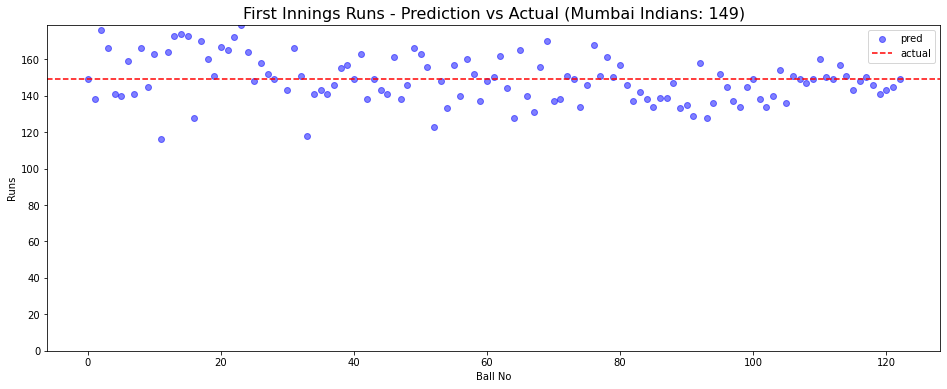

In [46]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing1_runs_pred))], ing1_runs_pred, alpha = 0.5, label = 'pred', color = 'blue')
plt.ylim(0, ing1_actual_score + 30)
plt.axhline(ing1_actual_score, ls = '--', label = 'actual', color = 'red')
plt.title('First Innings Runs - Prediction vs Actual (' + t1 + ': ' + str(ing1_actual_score) +  ')', fontsize = 16)
plt.legend()
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.show()

#### Error in 1st Innings runs:

In [47]:
np.mean([abs(i - ing1_actual_score) for i in ing1_runs_pred])

10.097560975609756

## Runs prediction chart: 2nd Innings

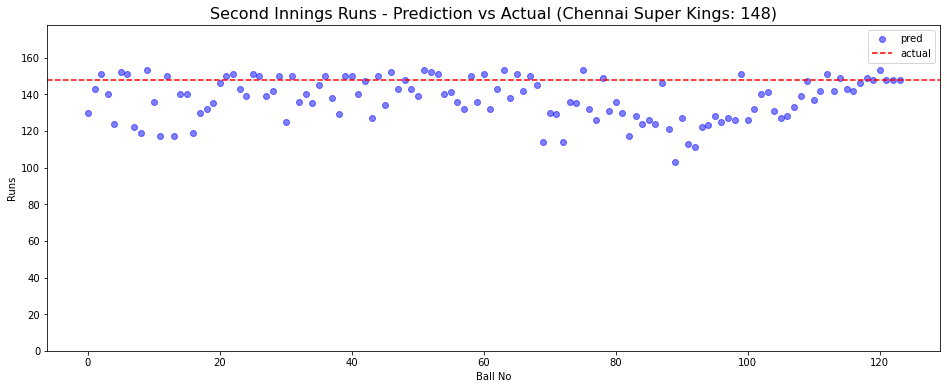

In [48]:
plt.figure(figsize = (16, 6))
plt.scatter([i for i in range(len(ing2_runs_pred))], ing2_runs_pred, alpha = 0.5, label = 'pred', color = 'blue')
plt.ylim(0, ing2_actual_score + 30)
plt.axhline(ing2_actual_score, ls = '--', label = 'actual', color = 'red')
plt.title('Second Innings Runs - Prediction vs Actual (' + t2 + ': ' + str(ing2_actual_score) +  ')', fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Runs')
plt.legend()
plt.show()

#### Error in 2nd Innings runs:

In [49]:
np.mean([abs(i - ing2_actual_score) for i in ing2_runs_pred])

11.725806451612904

# Win Predictions

## Win predictions: 1st Innings

In [50]:
# 1, 2 innings & predict win 

# for each ball make a prediction: 1st runs, 2nd runs, win/lose/tie

# initialize win/tie/lose
win_count = 0
tie_count = 0
lose_count = 0

win_count_ls = []
tie_count_ls = []
lose_count_ls = []

ing1_curr_score = 0
ing1_curr_overs = 0
ing1_curr_wickets = 0

# each ball
for i in range(len(df_ing1)):
    
    # 1st innings values
    ing1_curr_score += df_ing1.total_runs[i]
    ing1_curr_overs = df_ing1.ball[i]
    ing1_curr_wickets += df_ing1.isOut[i]
    
    #2nd innings values
    ing2_curr_score = 0
    ing2_curr_wickets = 0
    ing2_curr_overs = 0.0
    
    # make a prediction for 100 times & get win/lose/tie count(ex: 28% win)
    for j in range(100):
        
        ing1_prediction = innings_1_runs(ing1_curr_overs, ing1_curr_score, ing1_curr_wickets)
        target = ing1_prediction
        
        ing2_prediction = innings_2_runs(ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)
        
#         print(ing1_prediction, ing2_prediction)
        
        # prediction w.r.t 2nd team
        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

## Win predictions: 2nd Innings

In [51]:
# each ball
#2nd innings values
ing2_curr_score = 0
ing2_curr_wickets = 0
ing2_curr_overs = 0.0

for i in range(len(df_ing2)):
    
    # 1st innings values
    target = ing1_actual_score
    
    #2nd innings values
    ing2_curr_score += df_ing2.total_runs[i]
    ing2_curr_wickets += df_ing2.isOut[i]
    ing2_curr_overs = df_ing2.ball[i]
    
    # make a prediction for 100 times & get win/lose/tie count(ex: 28% win)
    for j in range(100):
        ing2_prediction = innings_2_runs(ing2_curr_overs, ing2_curr_score, ing2_curr_wickets, target)
        
#         print(target, ing2_prediction)
        
        # prediction w.r.t 2nd team
        if ing2_prediction > target:
            win_count += 1
        elif ing2_prediction == target:
            tie_count += 1
        else:
            lose_count += 1
            
    win_count_ls.append(win_count)
    tie_count_ls.append(tie_count)
    lose_count_ls.append(lose_count)
    
    win_count = 0
    tie_count = 0
    lose_count = 0

## Win Percentage Chart:

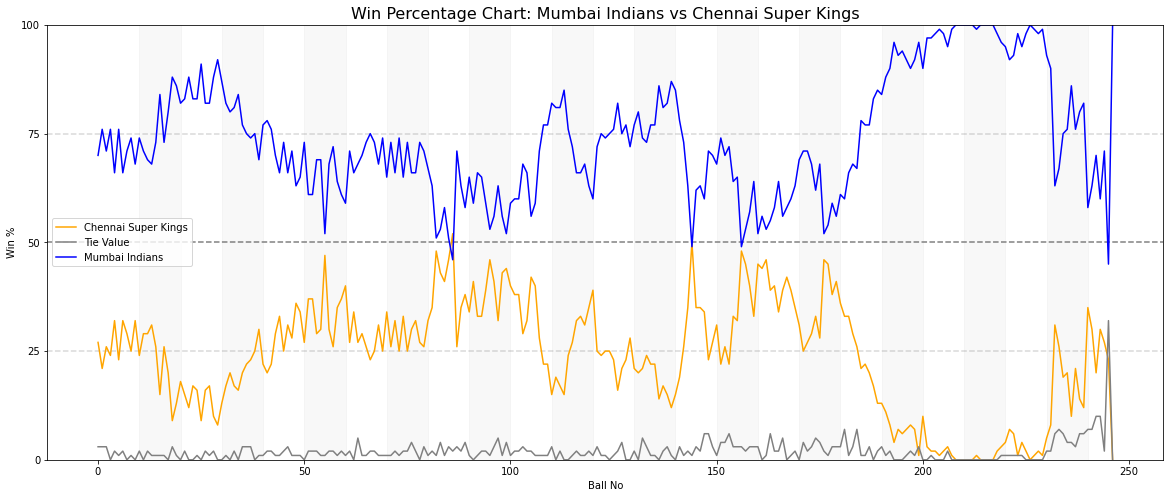

In [52]:
plt.figure(figsize = (20, 8))

x1_values = [i for i in range(len(win_count_ls))]
y1_values = win_count_ls

x2_values = [i for i in range(len(tie_count_ls))]
y2_values = tie_count_ls

x3_values = [i for i in range(len(lose_count_ls))]
y3_values = lose_count_ls

for i in range(10, len(final_df), 20):
    if i < len(final_df) - 10:
        plt.axvspan(i, i+10, ymin = 0, ymax = 100, alpha = 0.05, color='grey')
        
plt.axhline(y = 75, ls = '--', alpha = 0.3, c = 'grey')
plt.axhline(y = 50, ls = '--', alpha = 1, c = 'grey')
plt.axhline(y = 25, ls = '--', alpha = 0.3, c = 'grey')

plt.plot(x1_values, y1_values, color = 'orange', label = t2)
plt.plot(x2_values, y2_values, color = 'grey', label = 'Tie Value')
plt.plot(x3_values, y3_values, color = 'blue', label = t1)

plt.ylim(0, 100)
plt.yticks([0, 25, 50, 75, 100])



plt.title('Win Percentage Chart: ' + t1 + ' vs ' + t2, fontsize = 16)
plt.xlabel('Ball No')
plt.ylabel('Win %')
plt.legend()
plt.show()

# Interactive Model

## Fetch probability values:

In [53]:
print(t1_cum_pb)
print(t2_cum_pb)

[0.33793783917118897, 0.7271830291070548, 0.7799703996053281, 0.7839171188949187, 0.8993586581154416, 0.954612728169709, 1.0]
[0.3717768401312705, 0.7623066104078762, 0.817627754336615, 0.8190342240975151, 0.9179559306141584, 0.9587435536802624, 0.9999999999999999]


In [54]:
Mumbai_Indians = t1_cum_pb
chennai_sk = t2_cum_pb

In [55]:
Mumbai_Indians

[0.33793783917118897,
 0.7271830291070548,
 0.7799703996053281,
 0.7839171188949187,
 0.8993586581154416,
 0.954612728169709,
 1.0]

In [56]:
chennai_sk

[0.3717768401312705,
 0.7623066104078762,
 0.817627754336615,
 0.8190342240975151,
 0.9179559306141584,
 0.9587435536802624,
 0.9999999999999999]

In [57]:
def get_pbvalues(teamName):
    if teamName == 'MI':
        p_0 = 0.33793
        p_1 = 0.72718
        p_2 = 0.77997
        p_3 = 0.78391
        p_4 = 0.89935
        p_6 = 0.95461
        p_w = 1
        
    elif teamName == 'CSK':
        p_0 = 0.37177
        p_1 = 0.76230
        p_2 = 0.81762
        p_3 = 0.81903
        p_4 = 0.91795
        p_6 = 0.95874
        p_w = 1
        
    return p_0,p_1,p_2,p_3,p_4,p_6,p_w   

## Runs prediction Model:

In [58]:
def predict_runs(target, current_score, current_wickets, current_overs):
  
    # pb values of both teams
    i1p_0, i1p_1, i1p_2, i1p_3, i1p_4, i1p_6, i1p_w = get_pbvalues('MI')
    i2p_0, i2p_1, i2p_2, i2p_3, i2p_4, i2p_6, i2p_w = get_pbvalues('CSK')

    pred_runs = current_score
    pred_wks = current_wickets
    leftover_balls = 120 - current_overs*6

    for i in range(leftover_balls):
        r_value = np.random.random()

        if r_value <= i2p_0:
            pred_runs += 0
        elif r_value <= i2p_1:
            pred_runs += 1
        elif r_value <= i2p_2:
            pred_runs += 2
        elif r_value <= i2p_3:
            pred_runs += 3
        elif r_value <= i2p_4:
            pred_runs += 4
        elif r_value <= i2p_6:
            pred_runs += 6
        else:
            pred_runs += 0
            pred_wks += 1
            if pred_wks == 10:
                break
        if pred_runs > target:
            break
        # print('pred_runs: ', pred_runs)
        # print('pred_wks: ', pred_wks)
    
    return pred_runs

In [59]:
# predict_runs(target, current_score, current_wickets, current_overs)
predict_runs(149, 0, 0, 0)

147

## Winner function:

In [60]:
def get_win(pred_runs, target):
    if pred_runs > target:
        return 'win'
    elif pred_runs == target:
        return 'tie'
    else:
        return 'lose'

In [61]:
#runs, wickets, overs,
# win, 1st ing score

#MI = 149/8

target = 150

current_score = 72
current_wickets = 2
current_overs = 10

iter_count = 100

runs_ls = []
results_ls = []

win_count = 0
tie_count = 0
lose_count = 0

for i in range(iter_count):
    pred_runs = predict_runs(target, current_score, current_wickets, current_overs)
    runs_ls.append(pred_runs)
    result_pred = get_win(pred_runs, target)
    results_ls.append(result_pred)

    if result_pred == 'win':
        win_count += 1
    elif result_pred == 'tie':
        tie_count += 1
    else:
        lose_count +=1

In [62]:
win_count, tie_count, lose_count

(27, 1, 72)

## Find out Runs at a required stage:

In [63]:
# find out runs:
def find_runs(current_score, target, current_wickets, at_overs):
    runs_ls = []
    results_ls = []

    req_runs = []
    win_ls = []

    for i in range(current_score, target + 1):
        win_count = 0
        tie_count = 0
        lose_count = 0

        for j in range(100):
            pred_runs = predict_runs(target, i, current_wickets, at_overs)
            runs_ls.append(pred_runs)
            result_pred = get_win(pred_runs, target)
            results_ls.append(result_pred)

            if result_pred == 'win':
                win_count += 1
            elif result_pred == 'tie':
                tie_count += 1
            else:
                lose_count +=1

            win_ls.append(win_count)
            req_runs.append(i)
            # print('runs: ', i, ' win%: ', win_count)

    required_runs = current_score
    for i in range(len(req_runs)):
        if win_ls[i] >= 50:
            required_runs = req_runs[i]
            # print('Runs to be: ', req_runs[i])
            break

    return required_runs


In [64]:
#find_runs(curr_score, target, curr_wickets, at_overs)
find_runs(72, 150, 2, 10)

82

## Find out Wickets they can afford to lose:

In [65]:

def find_wickets(current_score, target, current_wickets, at_overs):

#     find_runs(current_score, target, current_wickets, at_overs)
    req_runs = find_runs(current_score, target, current_wickets, at_overs)

    runs_ls = []
    results_ls = []

    req_wks = []
    win_ls = []

    for i in range(current_wickets, 10):
        win_count = 0
        tie_count = 0
        lose_count = 0

        for j in range(100):
#             pred_runs = predict_runs(target, req_runs, i, at_overs)
            pred_runs = predict_runs(target, current_score, i, at_overs)
            runs_ls.append(pred_runs)
            result_pred = get_win(pred_runs, target)
            results_ls.append(result_pred)

            if result_pred == 'win':
                win_count += 1
            elif result_pred == 'tie':
                tie_count += 1
            else:
                lose_count +=1

        win_ls.append(win_count)
        req_wks.append(i)
#         print('wickets: ', i, ' win%: ', win_count)

    req_wicket_value = current_wickets
    
    for i in range(len(req_wks)):
        if (win_ls[i] < 45)  :
            req_wicket_value = req_wks[i]
            break

    return req_wicket_value

In [66]:
#wickets they can afford to lose:

# find_wickets(curr_score, target, curr_wickets, at_overs)
find_wickets(72, 150, 2, 10)

2

# Function: Interactive chart

In [68]:
%matplotlib inline
from ipywidgets import interactive
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

def find_runs_wickets(current_wks, at_overs, target_score):
    plt.figure(figsize = (16, 6))
    # x = np.linspace(-10, 10, num=1000)
    x = np.array(list(range(21)))
    req_value = find_runs(72, target_score, current_wks, at_overs)
    req_wk_value = find_wickets(72, target_score, current_wks, at_overs)

    if at_overs == 10:
        req_value = 82
        req_wk_value = 2

    
    # print(req_value)
    y = np.array([req_value for i in range(21)])

    # plt.plot(x, current_overs * x + target_score)
    # plt.plot(x, y)
    plt.scatter(at_overs, req_value, s = 1200, color = 'red')
    plt.axhline(target_score, ls = '--', color = 'blue')
    plt.text( 1, target_score + 10, 'Target Score :' + str(target_score) , color = 'darkblue', fontsize = 13)
    plt.text( at_overs, req_value, str(req_value) + '/' + str(req_wk_value), color = 'white', fontsize = 14,  horizontalalignment='center', verticalalignment='center')
    plt.text(at_overs, req_value - 30, 'SuperKings has to be at ' + str(req_value) + '/' +  str(req_wk_value) + ' after ' + str(at_overs) + ' ov', horizontalalignment='center',color = 'green')
    plt.ylim(50, target_score + 50)
    plt.xticks(x)
    plt.title('Where should SuperKings be?', fontsize = 20)
    plt.xlabel('Overs')
    plt.ylabel('Score')
    plt.show()

# x=widgets.IntSlider(min=-10, max=30, step=1, value=10)

# find_wickets(current_score, target, current_wickets, at_overs)
# find_wickets(72, 150, 2, 11)


## Interactive Visualization:

In [69]:
print('current_score = CSK: 72/2 (10 overs)')
print('')

interactive_plot = interactive(find_runs_wickets, current_wks = widgets.IntSlider(min=1, max=10, step=1, value=1),  at_overs=widgets.IntSlider(min=10, max=20, step=1, value=10), target_score = widgets.IntSlider(min=0, max=250, step=1, value=150))
output = interactive_plot.children[-1]
output.layout.height = '450px'
interactive_plot

current_score = CSK: 72/2 (10 overs)



interactive(children=(IntSlider(value=1, description='current_wks', max=10, min=1), IntSlider(value=10, descri…

### SuperKings were 10 runs behind at this stage (10 Overs) required runs 